<h1><center>CodeAlpha - Machine Learning Internship </center></h1>
<h1><center>Task 4 : Disease Prediction from
Medical Data </center></h1>

Aim : 
Create a model to predict the likelihood of a disease
based on medical data (e.g., symptoms, patient
history). Use datasets with labeled medical records and
apply classification algorithms.

Dataset Source - https://www.kaggle.com/datasets/data855/heart-disease

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df1 = pd.read_csv('heart.csv') #Copy

In [25]:
df.shape

(303, 14)

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#DataRe-Structuring

In [34]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [35]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 0] = 'normal'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
df['resting_electrocardiogram'][df['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [56]:
def change_label(value):
    if value ==1:
        return 'Disease Present'
    else:
        return 'No Disease'

In [57]:
df['target']= df['target'].apply(change_label)

In [58]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,Disease Present
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,Disease Present
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,Disease Present
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,Disease Present
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,Disease Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,flat,0,reversable defect,No Disease
299,45,male,asymptomatic,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,flat,0,reversable defect,No Disease
300,68,male,typical angina,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,flat,2,reversable defect,No Disease
301,57,male,typical angina,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,flat,1,reversable defect,No Disease


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    object 
 2   chest_pain_type            303 non-null    object 
 3   resting_blood_pressure     303 non-null    int64  
 4   cholesterol                303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    object 
 6   resting_electrocardiogram  303 non-null    object 
 7   max_heart_rate_achieved    303 non-null    int64  
 8   exercise_induced_angina    303 non-null    object 
 9   st_depression              303 non-null    float64
 10  st_slope                   303 non-null    object 
 11  num_major_vessels          303 non-null    int64  
 12  thalassemia                303 non-null    object 
 13  target                     303 non-null    int64  

target-
0=nodisease,
1=disease

#DataInspection

<Axes: xlabel='target', ylabel='count'>

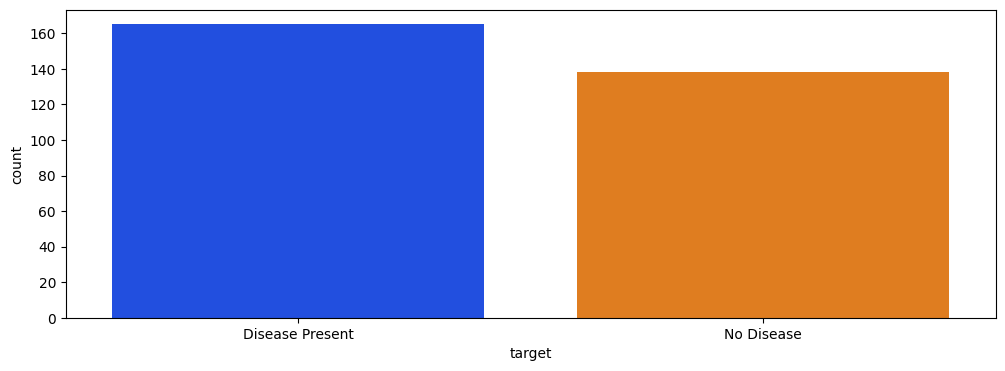

In [93]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='target',data=df,palette='bright')

<Axes: xlabel='st_depression', ylabel='Density'>

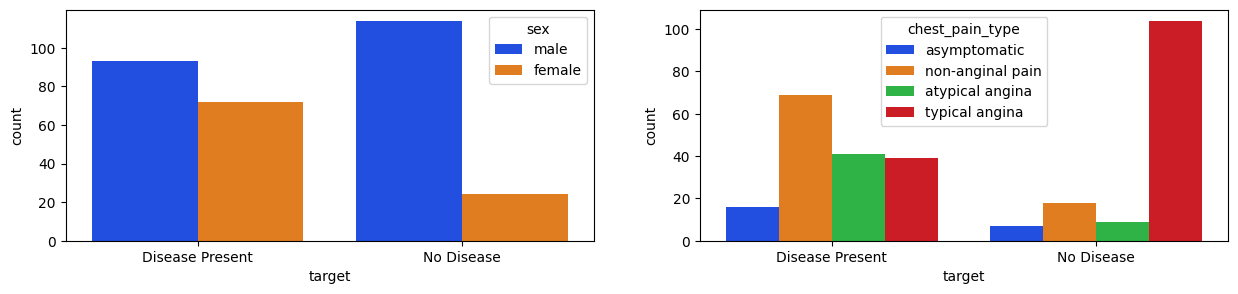

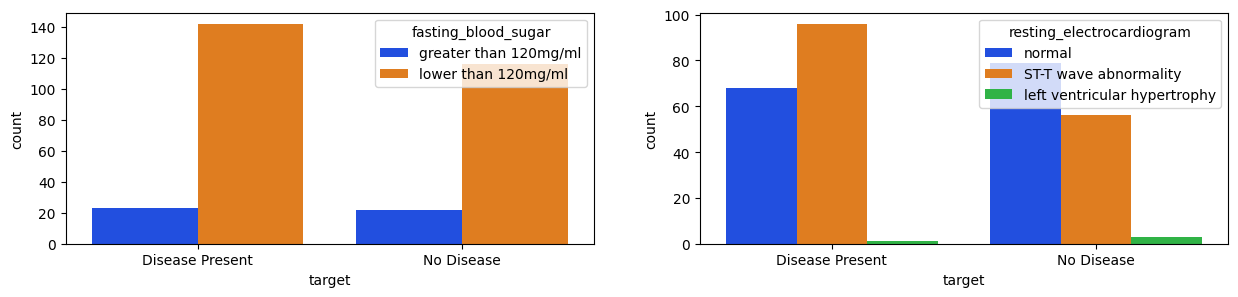

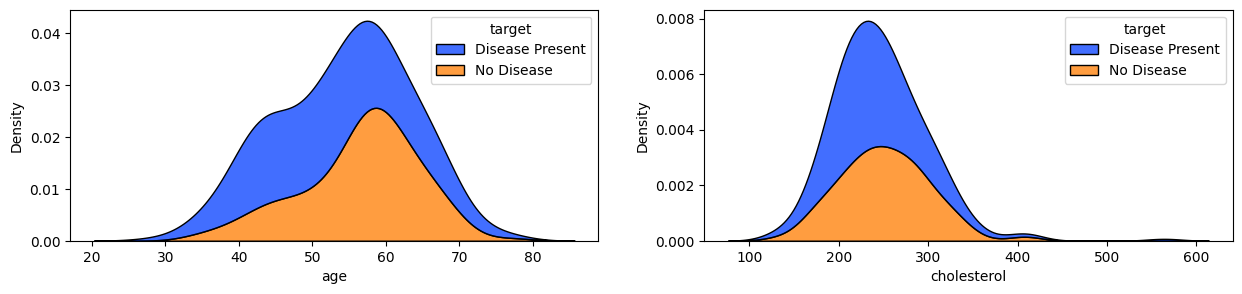

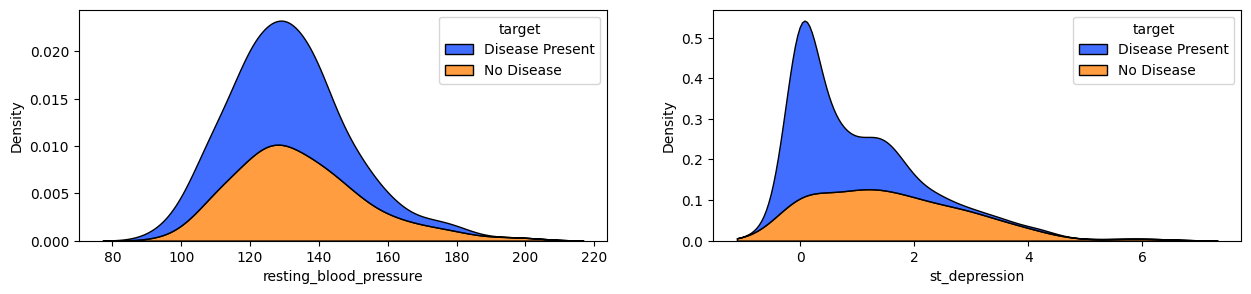

In [94]:
fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.countplot(x='target',data=df,palette='bright',hue='sex',ax=ax[0])
sns.countplot(x='target',data=df,palette='bright',hue='chest_pain_type',ax=ax[1])

fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.countplot(x='target',data=df,palette='bright',hue='fasting_blood_sugar',ax=ax[0])
sns.countplot(x='target',data=df,palette='bright',hue='resting_electrocardiogram',ax=ax[1])

fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.kdeplot(data=df, x='age', hue="target", multiple="stack",ax=ax[0],palette='bright')
sns.kdeplot(data=df, x='cholesterol', hue="target", multiple="stack",ax=ax[1],palette='bright')

fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.kdeplot(data=df, x='resting_blood_pressure', hue="target", multiple="stack",ax=ax[0],palette='bright')
sns.kdeplot(data=df, x='st_depression', hue="target", multiple="stack",ax=ax[1],palette='bright')

<Axes: >

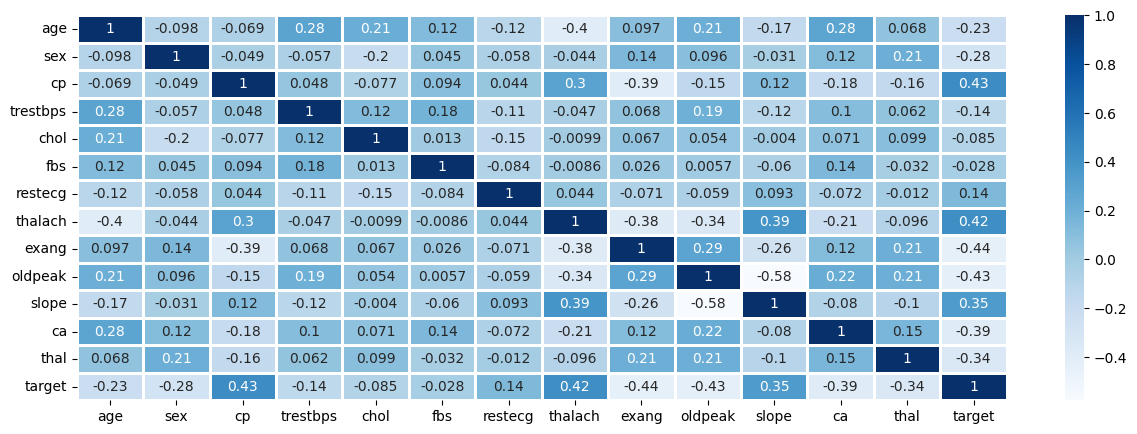

In [111]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),cmap='Blues',annot=True,linewidths=1,linecolor='white')

# Data Modeling

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df1.drop('target',axis=1)
y = df1['target']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,f1_score,recall_score

In [9]:
acc = []
rec = []
f1 = []
pre =[]

In [43]:
labels = ['KNN','Random Forest','Decision Tree','SVC']

# K Nearest Neighbours

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier(n_neighbors=10)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [13]:
y_pred=knn.predict(X_test)

In [14]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        42
           1       0.75      0.66      0.70        58

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.68      0.67      0.67       100



In [16]:
print("Accuracy using KNN = ",accuracy_score(y_test,y_pred))

Accuracy using KNN =  0.67


In [17]:
acc.append(accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test,y_pred))
pre.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Random Forest Classification

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rftree = RandomForestClassifier(n_estimators=10)

In [20]:
rftree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [21]:
y_pred =rftree.predict(X_test)

In [22]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.87      0.78      0.82        58

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



In [23]:
print("Accuracy using Random Forest = ",accuracy_score(y_test,y_pred))

Accuracy using Random Forest =  0.8


In [24]:
acc.append(accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test,y_pred))
pre.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Decision Tree Classification

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dtree.predict(X_test)

In [29]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        42
           1       0.82      0.69      0.75        58

    accuracy                           0.73       100
   macro avg       0.73      0.74      0.73       100
weighted avg       0.75      0.73      0.73       100



In [30]:
print("Accuracy using Decision Tree = ",accuracy_score(y_test,y_pred))

Accuracy using Decision Tree =  0.73


In [31]:
acc.append(accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test,y_pred))
pre.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Support Vector Machine

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(kernel='linear')

In [34]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
y_pred = svc.predict(X_test)

In [36]:
print("ClassificationReport=")
print(classification_report(y_test,y_pred))

ClassificationReport=
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.86      0.84      0.85        58

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [37]:
print("Accuracy using Support vector Machine = ",accuracy_score(y_test,y_pred))

Accuracy using Support vector Machine =  0.83


In [38]:
acc.append(accuracy_score(y_test,y_pred))
rec.append(recall_score(y_test,y_pred))
pre.append(precision_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Performance Evaluation

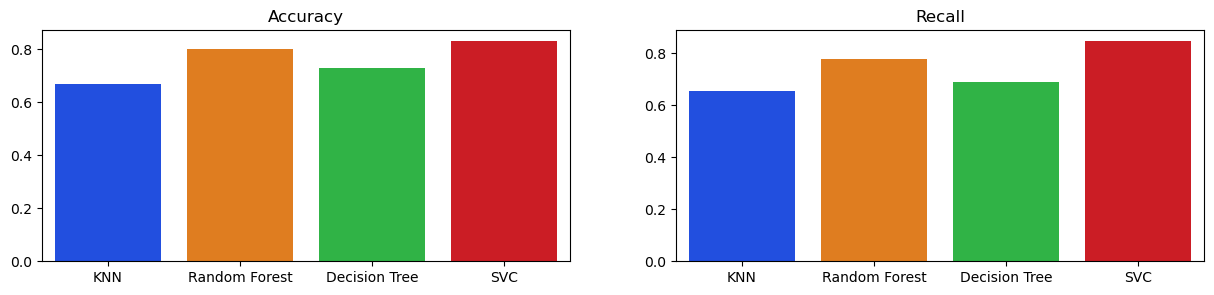

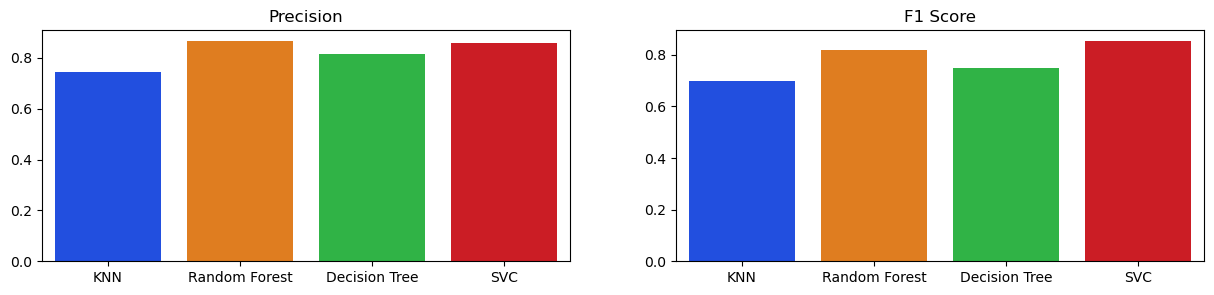

In [49]:
fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.barplot(x=labels, y=acc,palette='bright',ax = ax[0]).set_title("Accuracy");
sns.barplot(x=labels, y=rec,palette='bright',ax = ax[1]).set_title("Recall");

fig, ax = plt.subplots(1, 2,figsize=(15,3))
sns.barplot(x=labels, y=pre,palette='bright',ax = ax[0]).set_title("Precision");
sns.barplot(x=labels, y=f1,palette='bright',ax = ax[1]).set_title("F1 Score");

In conclusion, the analysis of Disease Prediction from Medical Data using machine learning algorithms, specifically K-Nearest Neighbors (KNN), Random Forest, and Decision Tree and Support vector machine, has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Support vector Machine Classifier emerges as the most effective algorithm among the three for predicting diseases in a patient.